**IMPORTING LIBRARIES**



In [0]:
from google.colab import files
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
import numpy
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

**IMPORTING DATASET**



In [0]:
url = "https://raw.githubusercontent.com/reubence/Google-DSC-Workshop-2020/master/datasets/WorkShopDataset2.csv"
df = pd.read_csv(url)

df.head(10) 

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,N,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,N,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [0]:
df.isnull().values.any() #Checking if there are any NULL values

True

In [0]:
df.isnull().sum().sum() #Total Number of NULL values

7

In [0]:
df.isnull().sum() #checking NULL values column-wise

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    0
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [0]:
missing_values = ["n/a", "na", "--"]
df1 = pd.read_csv(url, na_values = missing_values)

In [0]:
#Another way to remove NULL values
# df.replace(r'^\s*$', np.nan, regex=True) 

In [0]:
df1.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,N,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,N,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [0]:
df1.isna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,False,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,True,False,False


In [0]:
df1.isnull().sum().sum()

9

In [0]:
type(df1["NUM_BATH"][1]) #The value should be int/float. Not String. Need to change.

str

In [0]:
cnt=0
for row in df1['NUM_BATH']:
    try:
        df1.loc[cnt,"NUM_BATH"]=float(row)
        pass
    except ValueError:
        df1.loc[cnt, 'NUM_BATH']=np.nan
    cnt+=1

In [0]:
type(df1["NUM_BATH"][1]) #It's float now

float

In [0]:
cnt=0
for row in df1['OWN_OCCUPIED']:
    try:
        int(row)
        df1.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [0]:
df1.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,N,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,N,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


You can replace NA values using either Mean or Median. But it's not always the best idea to replace missing data. It depends on the dataset. Say for example our dataset was a customer feedabck, or some kind of a form which was filled by a person. In such a case it would make sense to fill the NA values using Mean.

For Example: If we replace with Mean on our current dataset we get this output, which doesn't make sense. Houses dont have 2.16777 bedrooms

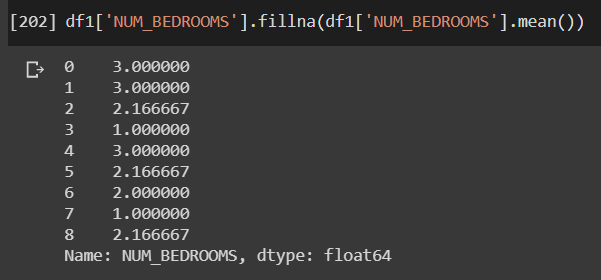

So instead, we can use median to fill in the NA values

In [0]:
df1['NUM_BEDROOMS'] = df1['NUM_BEDROOMS'].fillna(df1['NUM_BEDROOMS'].median())

In [0]:
df1['NUM_BATH'] = df1['NUM_BATH'].fillna(df1['NUM_BATH'].median())

In [0]:
df1['SQ_FT'] = df1['SQ_FT'].fillna(df1['SQ_FT'].median())

In [0]:
df1['ST_NUM'] = df1['ST_NUM'].fillna(df1['ST_NUM'].median())

In [0]:
df1.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,950.0
2,100003000.0,203.0,LEXINGTON,N,2.5,1.0,850.0
3,100004000.0,201.0,BERKELEY,N,1.0,1.0,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1.0,800.0
6,100007000.0,203.0,WASHINGTON,N,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,950.0
8,100009000.0,215.0,TREMONT,Y,2.5,2.0,1800.0


In [0]:
df1.drop(["PID"], axis = 1,inplace = True)
df1.head(10)

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,197.0,LEXINGTON,N,3.0,1.5,950.0
2,203.0,LEXINGTON,N,2.5,1.0,850.0
3,201.0,BERKELEY,N,1.0,1.0,700.0
4,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,207.0,BERKELEY,Y,2.5,1.0,800.0
6,203.0,WASHINGTON,N,2.0,1.0,950.0
7,213.0,TREMONT,Y,1.0,1.0,950.0
8,215.0,TREMONT,Y,2.5,2.0,1800.0


In [0]:
Y = df1["OWN_OCCUPIED"]
Y

0    Y
1    N
2    N
3    N
4    Y
5    Y
6    N
7    Y
8    Y
Name: OWN_OCCUPIED, dtype: object

In [0]:
df1.drop["OWN_OCCUPIED"]
X = df1

TypeError: ignored

# **Support-Vector Machines**

In [0]:
svc = LinearSVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
svc.score(X_test,y_test)

0.3333333333333333

In [0]:
predictions3 = svc.predict(X_test)
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           N       0.33      1.00      0.50         1
           Y       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(confusion_matrix(y_test,predictions3))

[[1 0]
 [2 0]]


# **Logistic Regression**

In [0]:
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=42)

In [0]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

array(['N', 'N', 'N'], dtype=object)

In [0]:
clf.score(X_test,y_test)

0.3333333333333333

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           N       0.33      1.00      0.50         1
           Y       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(confusion_matrix(y_test,predictions))

[[1 0]
 [2 0]]


# **Linear Regression**

In [0]:
X

,ST_NUM,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,104.0,3.0,1.0,1000.0
1,197.0,3.0,1.5,950.0
2,203.0,2.5,1.0,850.0
3,201.0,1.0,1.0,700.0
4,203.0,3.0,2.0,1600.0
5,207.0,2.5,1.0,800.0
6,203.0,2.0,1.0,950.0
7,213.0,1.0,1.0,950.0
8,215.0,2.5,2.0,1800.0


In [0]:

Yy = X["NUM_BEDROOMS"]

In [0]:
Xx = X[["ST_NUM", "NUM_BATH", "SQ_FT"]]

In [0]:
Xx_train, Xx_test, Yy_train, Yy_test = tts(Xx, Yy, test_size=0.3, random_state=42)

In [0]:
reg = LinearRegression()

In [0]:
reg.fit(Xx_train,Yy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.score(Xx_test,Yy_test)

-0.4124607204687021

In [0]:
Yy_test

7    1.0
1    3.0
5    2.5
Name: NUM_BEDROOMS, dtype: float64

In [0]:
predictions2 = reg.predict(Xx_test)
predictions2

array([1.94842878, 1.75705714, 1.71520228])

In [0]:
Yy_test

7    1.0
1    3.0
5    2.5
Name: NUM_BEDROOMS, dtype: float64

As seen below, there is no Linear relationship between variables, hence bad performance

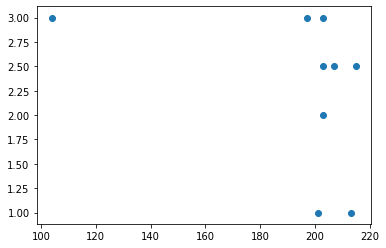

In [0]:
plt.scatter(Xx["ST_NUM"],Yy)
plt.show()

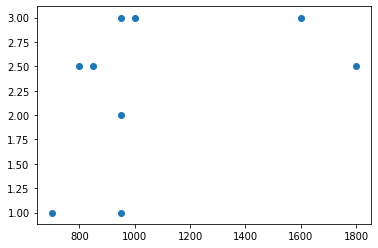

In [0]:

plt.scatter(Xx["SQ_FT"],Yy)
plt.show()

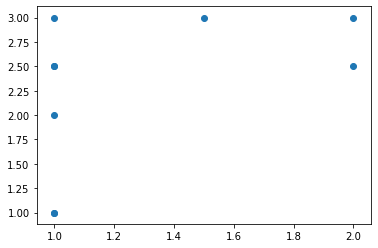

In [0]:

plt.scatter(Xx["NUM_BATH"],Yy)
plt.show()

# **K-Means**

In [0]:
# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

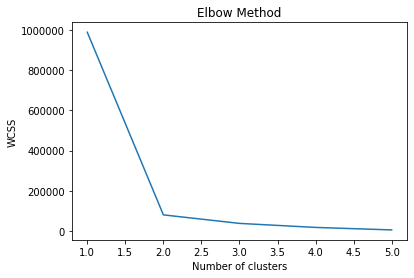

In [0]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_test)

In [0]:
X_test

,ST_NUM,NUM_BEDROOMS,NUM_BATH,SQ_FT
7,213.0,1.0,1.0,950.0
1,197.0,3.0,1.5,950.0
5,207.0,2.5,1.0,800.0


In [0]:
y_test

7    Y
1    N
5    Y
Name: OWN_OCCUPIED, dtype: object

In [0]:
from google.colab import files
import numpy as np
import pandas as pd

In [0]:
files =  files.upload()

KeyboardInterrupt: ignored

In [0]:
weather = pd.read_csv("/content/sudeste.csv")

UnicodeDecodeError: ignored